# Trie(Representation, Search and Insert)

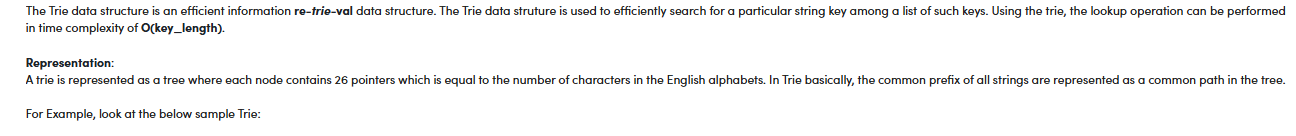

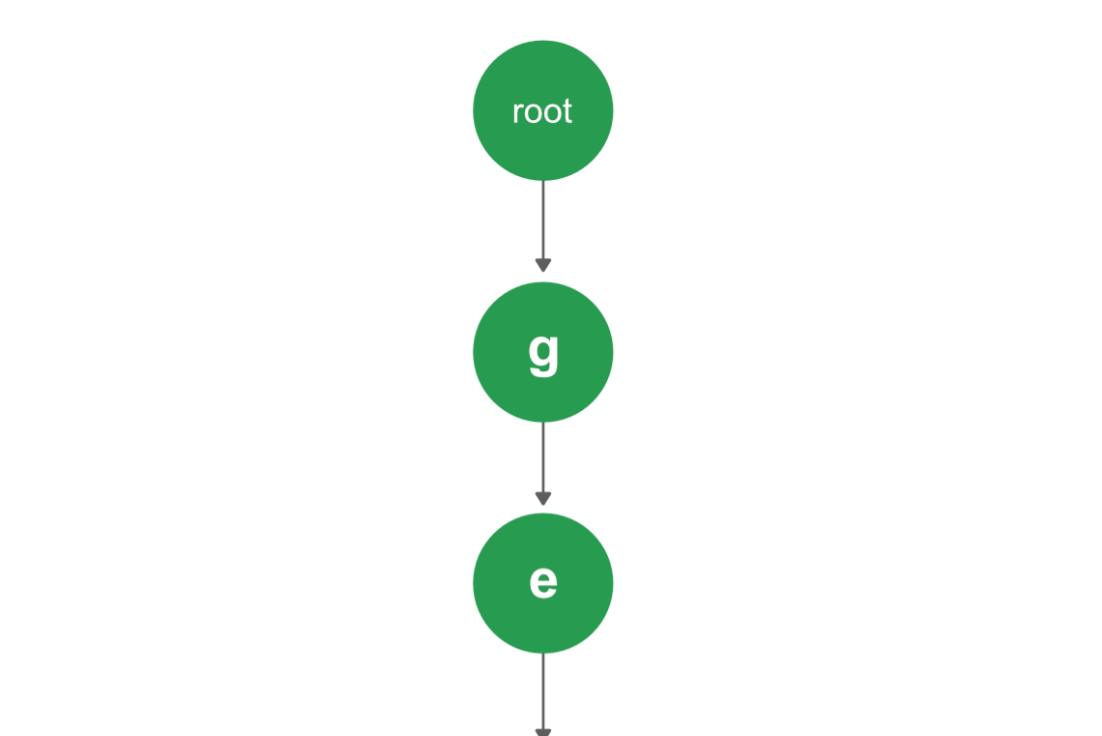

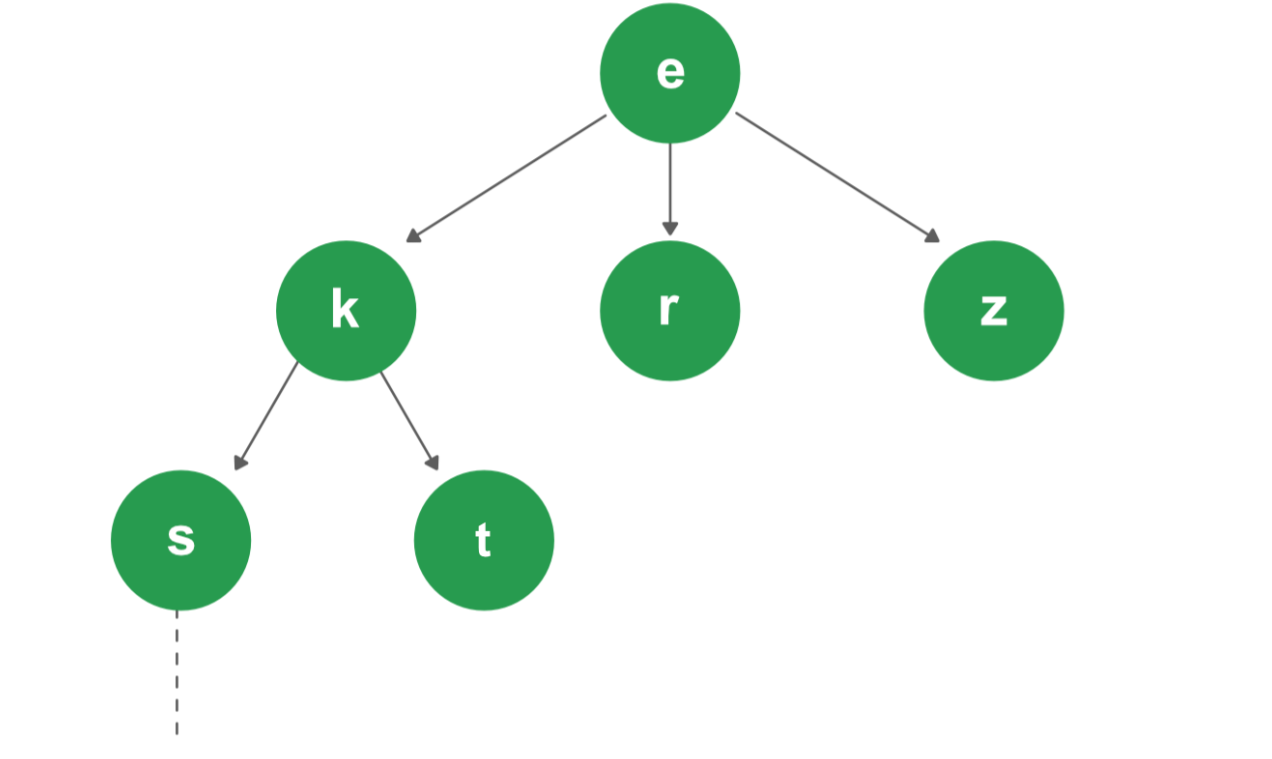

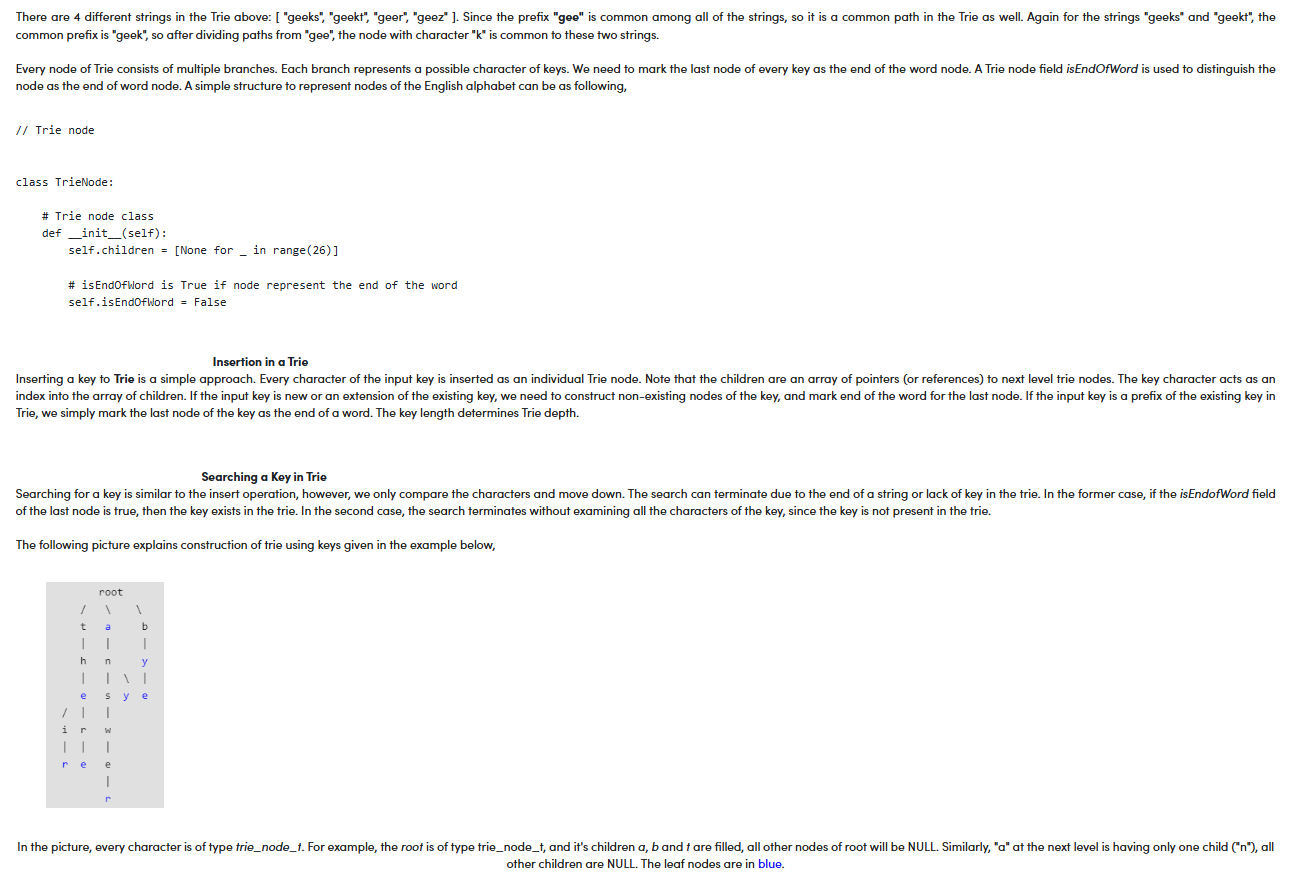

In [48]:
# Python program for insert and search
# operation in a Trie

class TrieNode:

	# Trie node class
	def __init__(self):
		self.children = [None]*26

		# isEndOfWord is True if node represent the end of the word
		self.isEndOfWord = False

class Trie:

	# Trie data structure class
	def __init__(self):
		self.root = self.getNode()

	def getNode(self):

		# Returns new trie node (initialized to NULLs)
		return TrieNode()

	def _charToIndex(self,ch):

		# private helper function
		# Converts key current character into index
		# use only 'a' through 'z' and lower case

		return ord(ch)-ord('a')


	def insert(self,key):

		# If not present, inserts key into trie
		# If the key is prefix of trie node,
		# just marks leaf node
		pCrawl = self.root
		length = len(key)
		for level in range(length):
			index = self._charToIndex(key[level])

			# if current character is not present
			if not pCrawl.children[index]:
				pCrawl.children[index] = self.getNode()
			pCrawl = pCrawl.children[index]

		# mark last node as leaf
		pCrawl.isEndOfWord = True

	def search(self, key):

		# Search key in the trie
		# Returns true if key presents
		# in trie, else false
		pCrawl = self.root
		length = len(key)
		for level in range(length):
			index = self._charToIndex(key[level])
			if not pCrawl.children[index]:
				return False
			pCrawl = pCrawl.children[index]

		return pCrawl.isEndOfWord

# driver function
def main():

	# Input keys (use only 'a' through 'z' and lower case)
	keys = ["the","a","there","anaswe","any",
			"by","their"]
	output = ["Not present in trie",
			"Present in trie"]

	# Trie object
	t = Trie()

	# Construct trie
	for key in keys:
		t.insert(key)

	# Search for different keys
	print("{} ---- {}".format("the",output[t.search("the")]))
	print("{} ---- {}".format("these",output[t.search("these")]))
	print("{} ---- {}".format("their",output[t.search("their")]))
	print("{} ---- {}".format("thaw",output[t.search("thaw")]))

if __name__ == '__main__':
	main()

the ---- Present in trie
these ---- Not present in trie
their ---- Present in trie
thaw ---- Not present in trie


**Time Complexity:** Both the insert and search operations in a Trie takes O(M) time. Where M is the length of the key being inserted or searched for in the Trie.

# Auto-complete feature using Trie

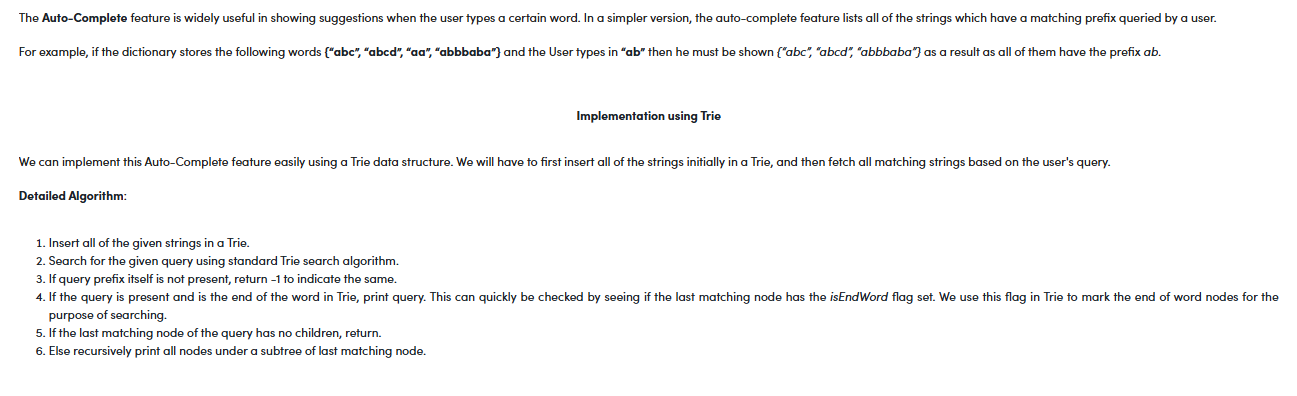

In [49]:
# Python3 program to demonstrate auto-complete
# feature using Trie data structure.
# Note: This is a basic implementation of Trie
# and not the most optimized one.


class TrieNode():
	def __init__(self):
		# Initialising one node for trie
		self.children = {}
		self.last = False


class Trie():
	def __init__(self):

		# Initialising the trie structure.
		self.root = TrieNode()

	def formTrie(self, keys):

		# Forms a trie structure with the given set of strings
		# if it does not exists already else it merges the key
		# into it by extending the structure as required
		for key in keys:
			self.insert(key) # inserting one key to the trie.

	def insert(self, key):

		# Inserts a key into trie if it does not exist already.
		# And if the key is a prefix of the trie node, just
		# marks it as leaf node.
		node = self.root

		for a in key:
			if not node.children.get(a):
				node.children[a] = TrieNode()

			node = node.children[a]

		node.last = True

	def suggestionsRec(self, node, word):

		# Method to recursively traverse the trie
		# and return a whole word.
		if node.last:
			print(word)

		for a, n in node.children.items():
			self.suggestionsRec(n, word + a)

	def printAutoSuggestions(self, key):

		# Returns all the words in the trie whose common
		# prefix is the given key thus listing out all
		# the suggestions for autocomplete.
		node = self.root

		for a in key:
			# no string in the Trie has this prefix
			if not node.children.get(a):
				return 0
			node = node.children[a]

		# If prefix is present as a word, but
		# there is no subtree below the last
		# matching node.
		if not node.children:
			return -1

		self.suggestionsRec(node, key)
		return 1


# Driver Code
keys = ["hello", "dog", "hell", "cat", "a",
		"hel", "help", "helps", "helping"] # keys to form the trie structure.
key = "h" # key for autocomplete suggestions.

# creating trie object
t = Trie()

# creating the trie structure with the
# given set of strings.
t.formTrie(keys)

# autocompleting the given key using
# our trie structure.
comp = t.printAutoSuggestions(key)

if comp == -1:
	print("No other strings found with this prefix\n")
elif comp == 0:
	print("No string found with this prefix\n")

hel
hell
hello
help
helps
helping


# Trie Delete

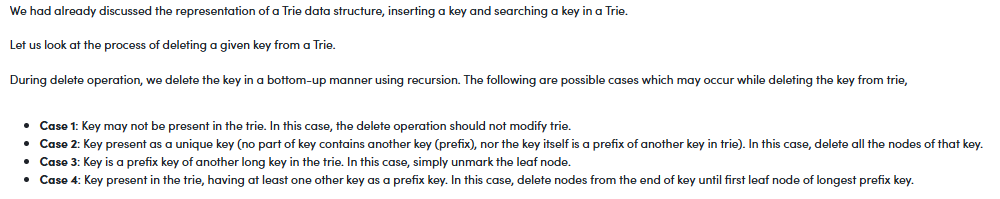

In [50]:
def isEmpty(root):
    for x in root.child:
        if x!=None:
            return False
    return True

def delNode(root,key,i=0):
    if root==None:
        return None

    if i==len(key):
        if root.isEndOfWord:
            root.isEndOfWord=False

        if isEmpty(root):
            root=None

        return root

    index = ord(key[i])-ord('a')
    root.child[index]=remove(root.child[index],key,i+1)
    if isEmpty(root) and root.isEndOfWord==False:
        root=None

    return root